# Explore here

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
import os
import json
from sklearn.linear_model import LinearRegression

In [2]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
total_data.shape

(768, 9)

In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
total_data.duplicated().sum()

np.int64(0)

In [6]:
total_data.drop(["BloodPressure", "SkinThickness"], axis = 1, inplace = True)
total_data.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


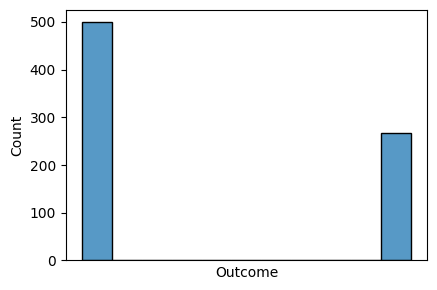

In [7]:
#Automatizacion Categoricos
categorical_variables = ["Outcome"]

# Calcular filas y columnas para organizar los gráficos en 3 por fila
num_cols = 3

num_rows = math.ceil(len(categorical_variables) / num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows))

# Asegurar que axes es siempre una lista bidimensional
axes = axes.reshape(num_rows, num_cols) if num_rows > 1 else [axes]

# Generar los gráficos
col_index = 0
for row in range(num_rows):
    for col in range(num_cols):
        if col_index < len(categorical_variables):
            sns.histplot(data=total_data, x= categorical_variables[col_index], ax=axes[row][col])
            axes[row][col].set_xticks([])
            col_index += 1
        else:
            fig.delaxes(axes[row][col])  # Elimina gráficos vacíos
plt.tight_layout()
plt.show()



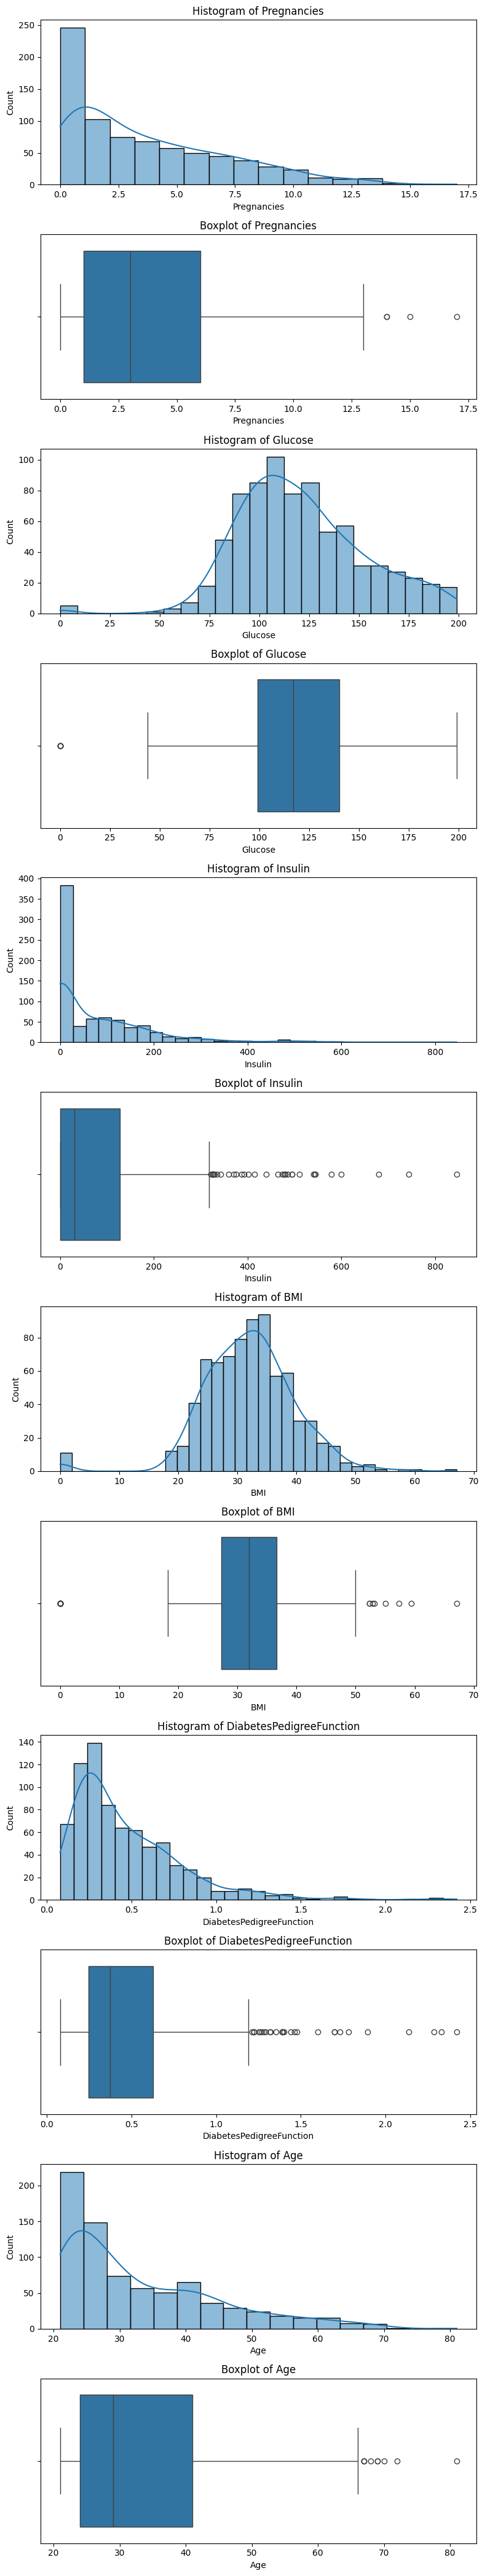

In [8]:
#Automatizacion Numerales
numericals_variables = ["Pregnancies", "Glucose",	"Insulin",	"BMI",	"DiabetesPedigreeFunction",	"Age"]
 # Crear la figura con 1 columnas y 2 filas por variable.
fig, axis = plt.subplots(len(numericals_variables) * 2, 1, figsize=(8, len(numericals_variables) * 7))
    # Definir límites de los ejes x para cada par de gráficos (histograma y boxplot).
    # RECORDAR CAMBIAR LOS NOMBRES Y PONER LOS DE LAS COLUMNAS DE DF CORRESPONDIENTE.
x_limits = {
        'age': (0, 100),   # Rango para el histograma y el boxplot de columna1...
        'duration': (0, 2000),
        'campaign': (0, 20),
        'pdays': (0, 2000),
        # Añadir más columnas y rangos si es necesario...
    }
    # Iterar sobre cada columna del DataFrame
for i, col in enumerate(numericals_variables):
        index = i * 2
        # Histograma en la primera fila
        sns.histplot(data = total_data, x = col, kde = True, ax = axis[index])
        axis[index].set_title(f'Histogram of {col}')
        # Establecer límites del eje x para el histograma
        if col in x_limits:
            axis[index].set_xlim(x_limits[col])  # Asigna el rango de valores personalizado al histograma
        # Boxplot en la segunda fila
        sns.boxplot(data = total_data, x = col, ax = axis[index + 1])
        axis[index + 1].set_title(f'Boxplot of {col}')
        # Establecer límites del eje x para el boxplot (mismo rango que el histograma)
        if col in x_limits:
            axis[index + 1].set_xlim(x_limits[col])  # Asigna el mismo rango de valores al boxplot
plt.tight_layout()
plt.show()

In [9]:
total_data["Outcome_n"] = pd.factorize(total_data["Outcome"])[0]

Outcome_transformation_rules = {int(row["Outcome_n"]): str(row["Outcome"]) for _, row in total_data[["Outcome", "Outcome_n"]].drop_duplicates().iterrows()}

import json

with open("Outcome_transformation_rules.json", "w") as f:
  json.dump(Outcome_transformation_rules, f)

# ----------------------------------------------------------------------------------
# EN PRODUCCIÓN (CUANDO HAYÁIS ENTRENADO EL MODELO Y OS LLEGUEN DATOS NUEVOS) HACÉIS:

with open("Outcome_transformation_rules.json", "r") as f:
  Outcome_transformation_rules = json.load(f)

total_data["Outcome_n"] = total_data["Outcome"].apply(lambda x: Outcome_transformation_rules.get(str(x), -1))  # Usar -1 o cualquier otro valor por defecto para valores desconocidos

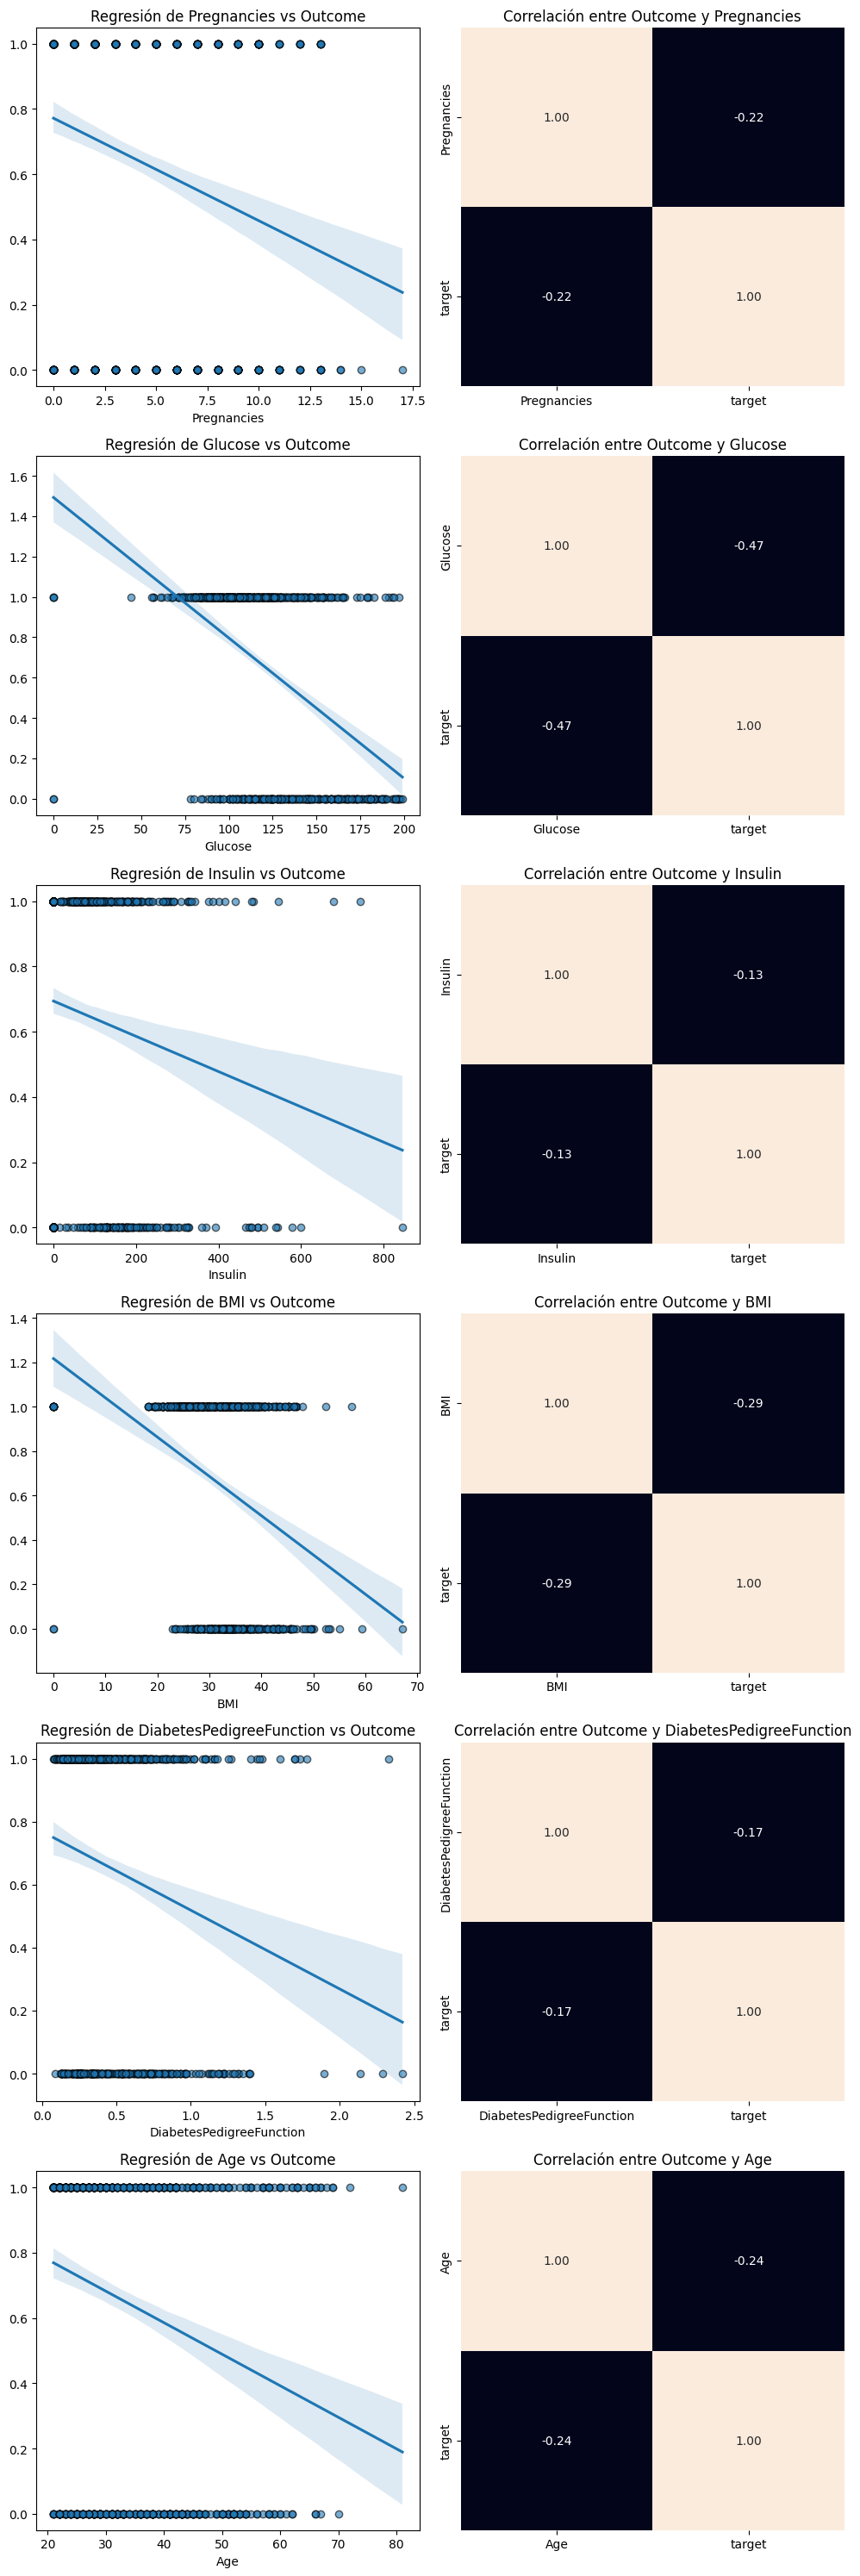

In [10]:
# # Automatizacion Numerico-Numerico

# Crear la variable objetivo (categórica)
target = total_data["Outcome"]

# Factorizar el target y guardar el nombre de la columna
target_numeric = pd.factorize(target)[0]  # Convertir a valores numéricos
target_name = target.name  # Guardar el nombre de la columna original

# Variables numéricas
num_variables = ["Pregnancies", "Glucose",	"Insulin",	"BMI",	"DiabetesPedigreeFunction",	"Age"]

# Crear la figura y los ejes
num_rows = len(num_variables)
fig, axis = plt.subplots(num_rows, 2, figsize=(10, 5 * num_rows))

# Crear gráficos para cada variable
for i, var in enumerate(num_variables):
    # Scatterplot con regresión lineal
    sns.regplot(ax=axis[i, 0], data=total_data, x=var, y=target_numeric, scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
    axis[i, 0].set_title(f"Regresión de {var} vs {target_name}")
    
    # Heatmap de correlación
    correlation_data = total_data[[var]].assign(target=target_numeric)  # Crear un DataFrame con la variable y el target
    sns.heatmap(correlation_data.corr(), annot=True, fmt=".2f", ax=axis[i, 1], cbar=False)
    axis[i, 1].set_title(f"Correlación entre {target_name} y {var}")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

<Axes: >

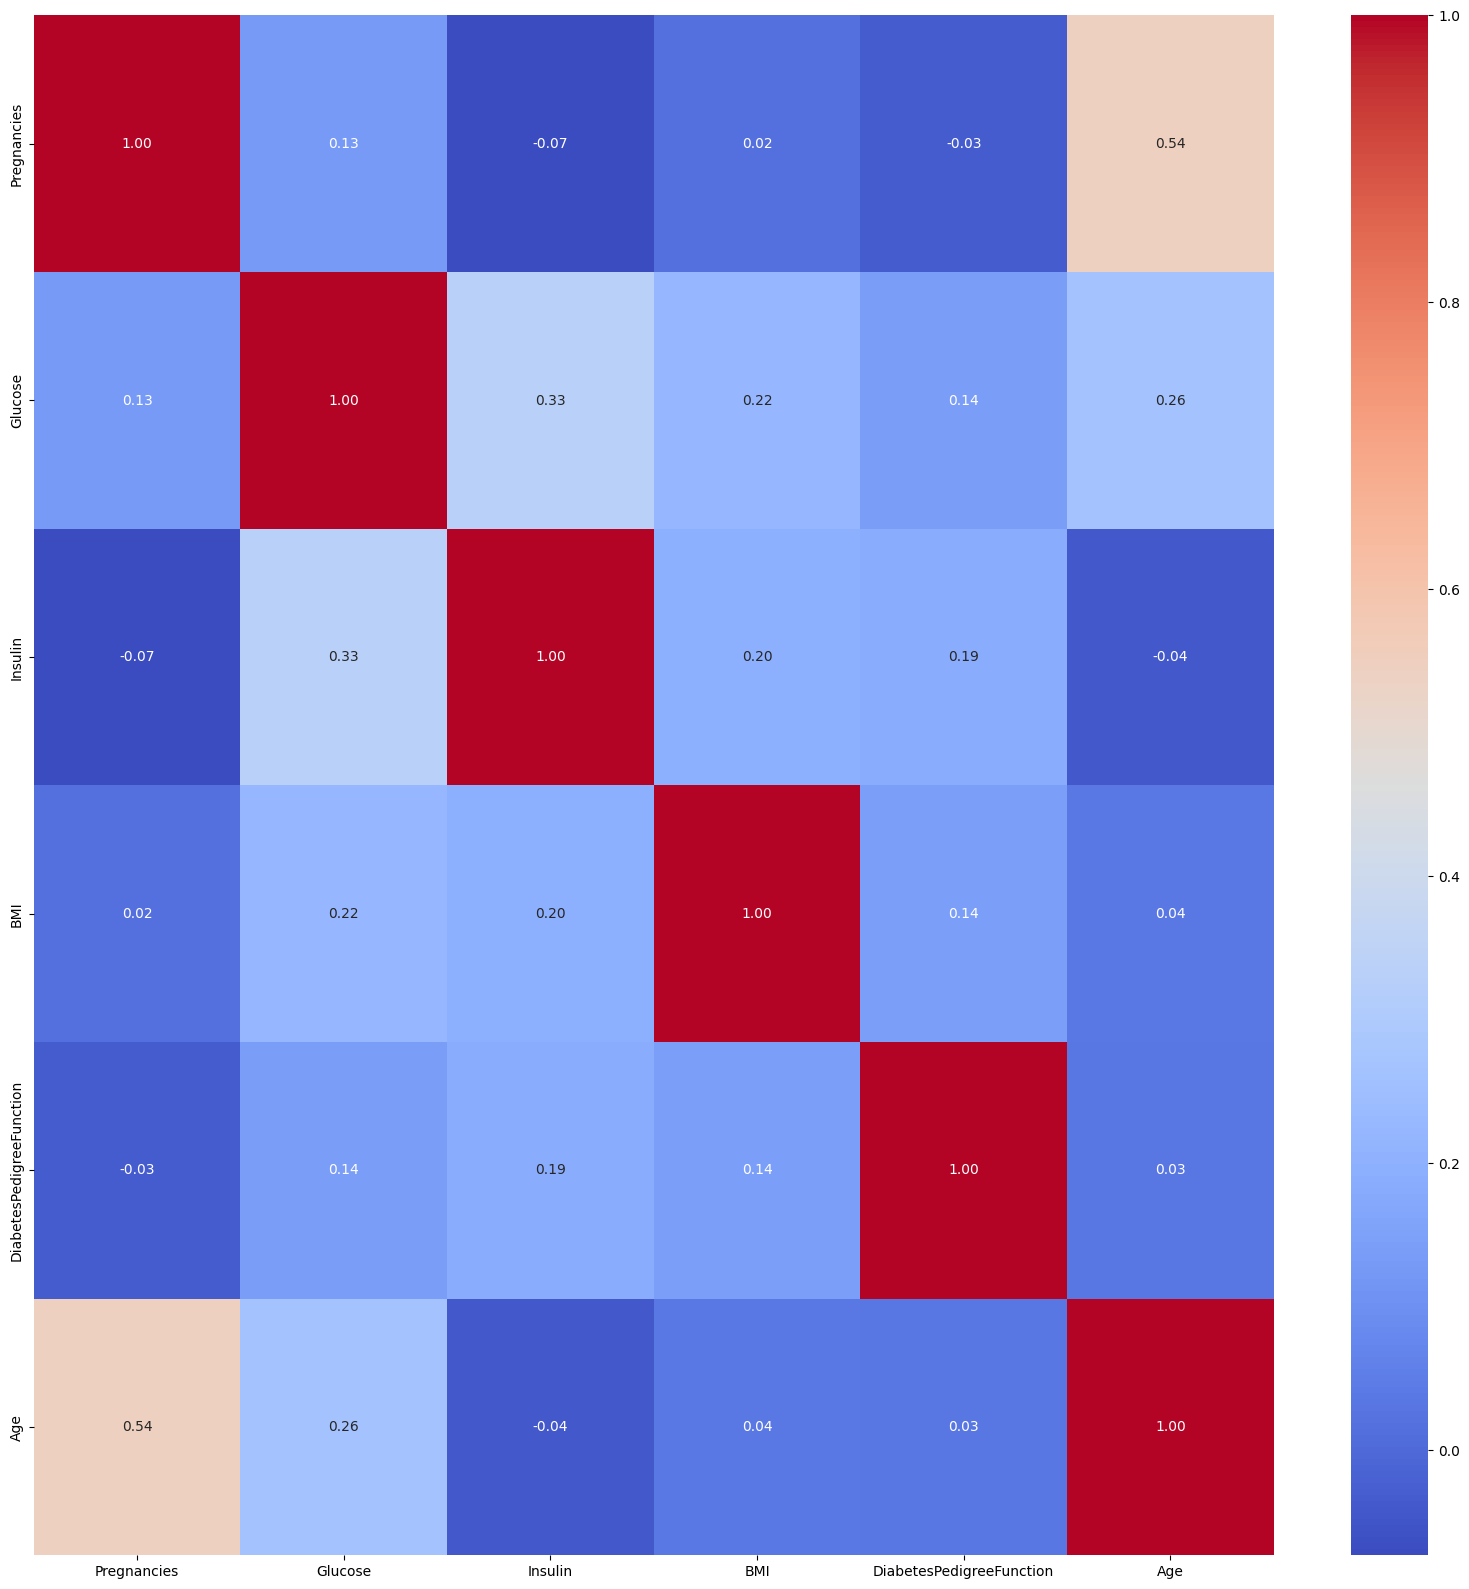

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

total_numerical_variables = ["Pregnancies", "Glucose",	"Insulin",	"BMI",	"DiabetesPedigreeFunction",	"Age"]
# Mapa de calor de la matriz de correlación
plt.figure(figsize=(20, 20))
sns.heatmap(total_data[total_numerical_variables].corr(), annot=True, fmt='.2f', cmap="coolwarm")


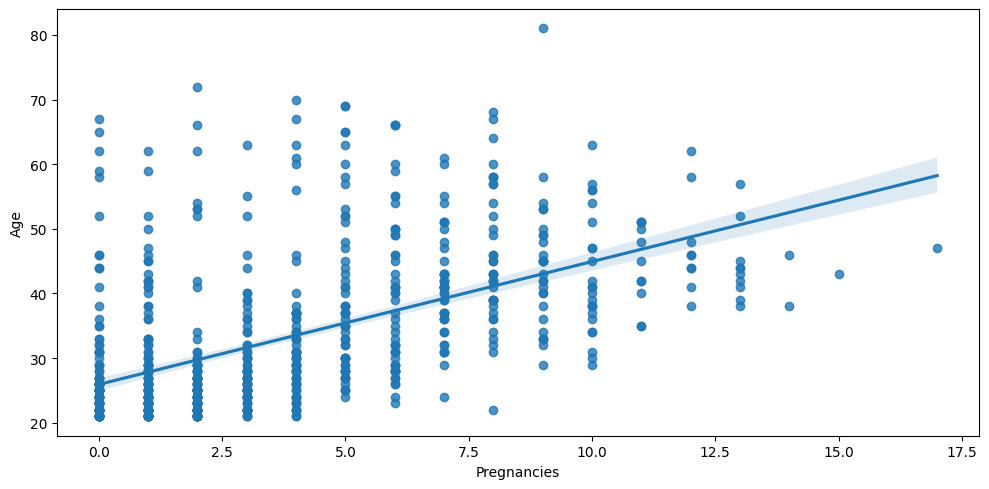

In [12]:
fig, axis = plt.subplots(figsize = (10, 5))
sns.regplot(data = total_data, x = "Pregnancies", y = "Age")
plt.tight_layout()
plt.show()



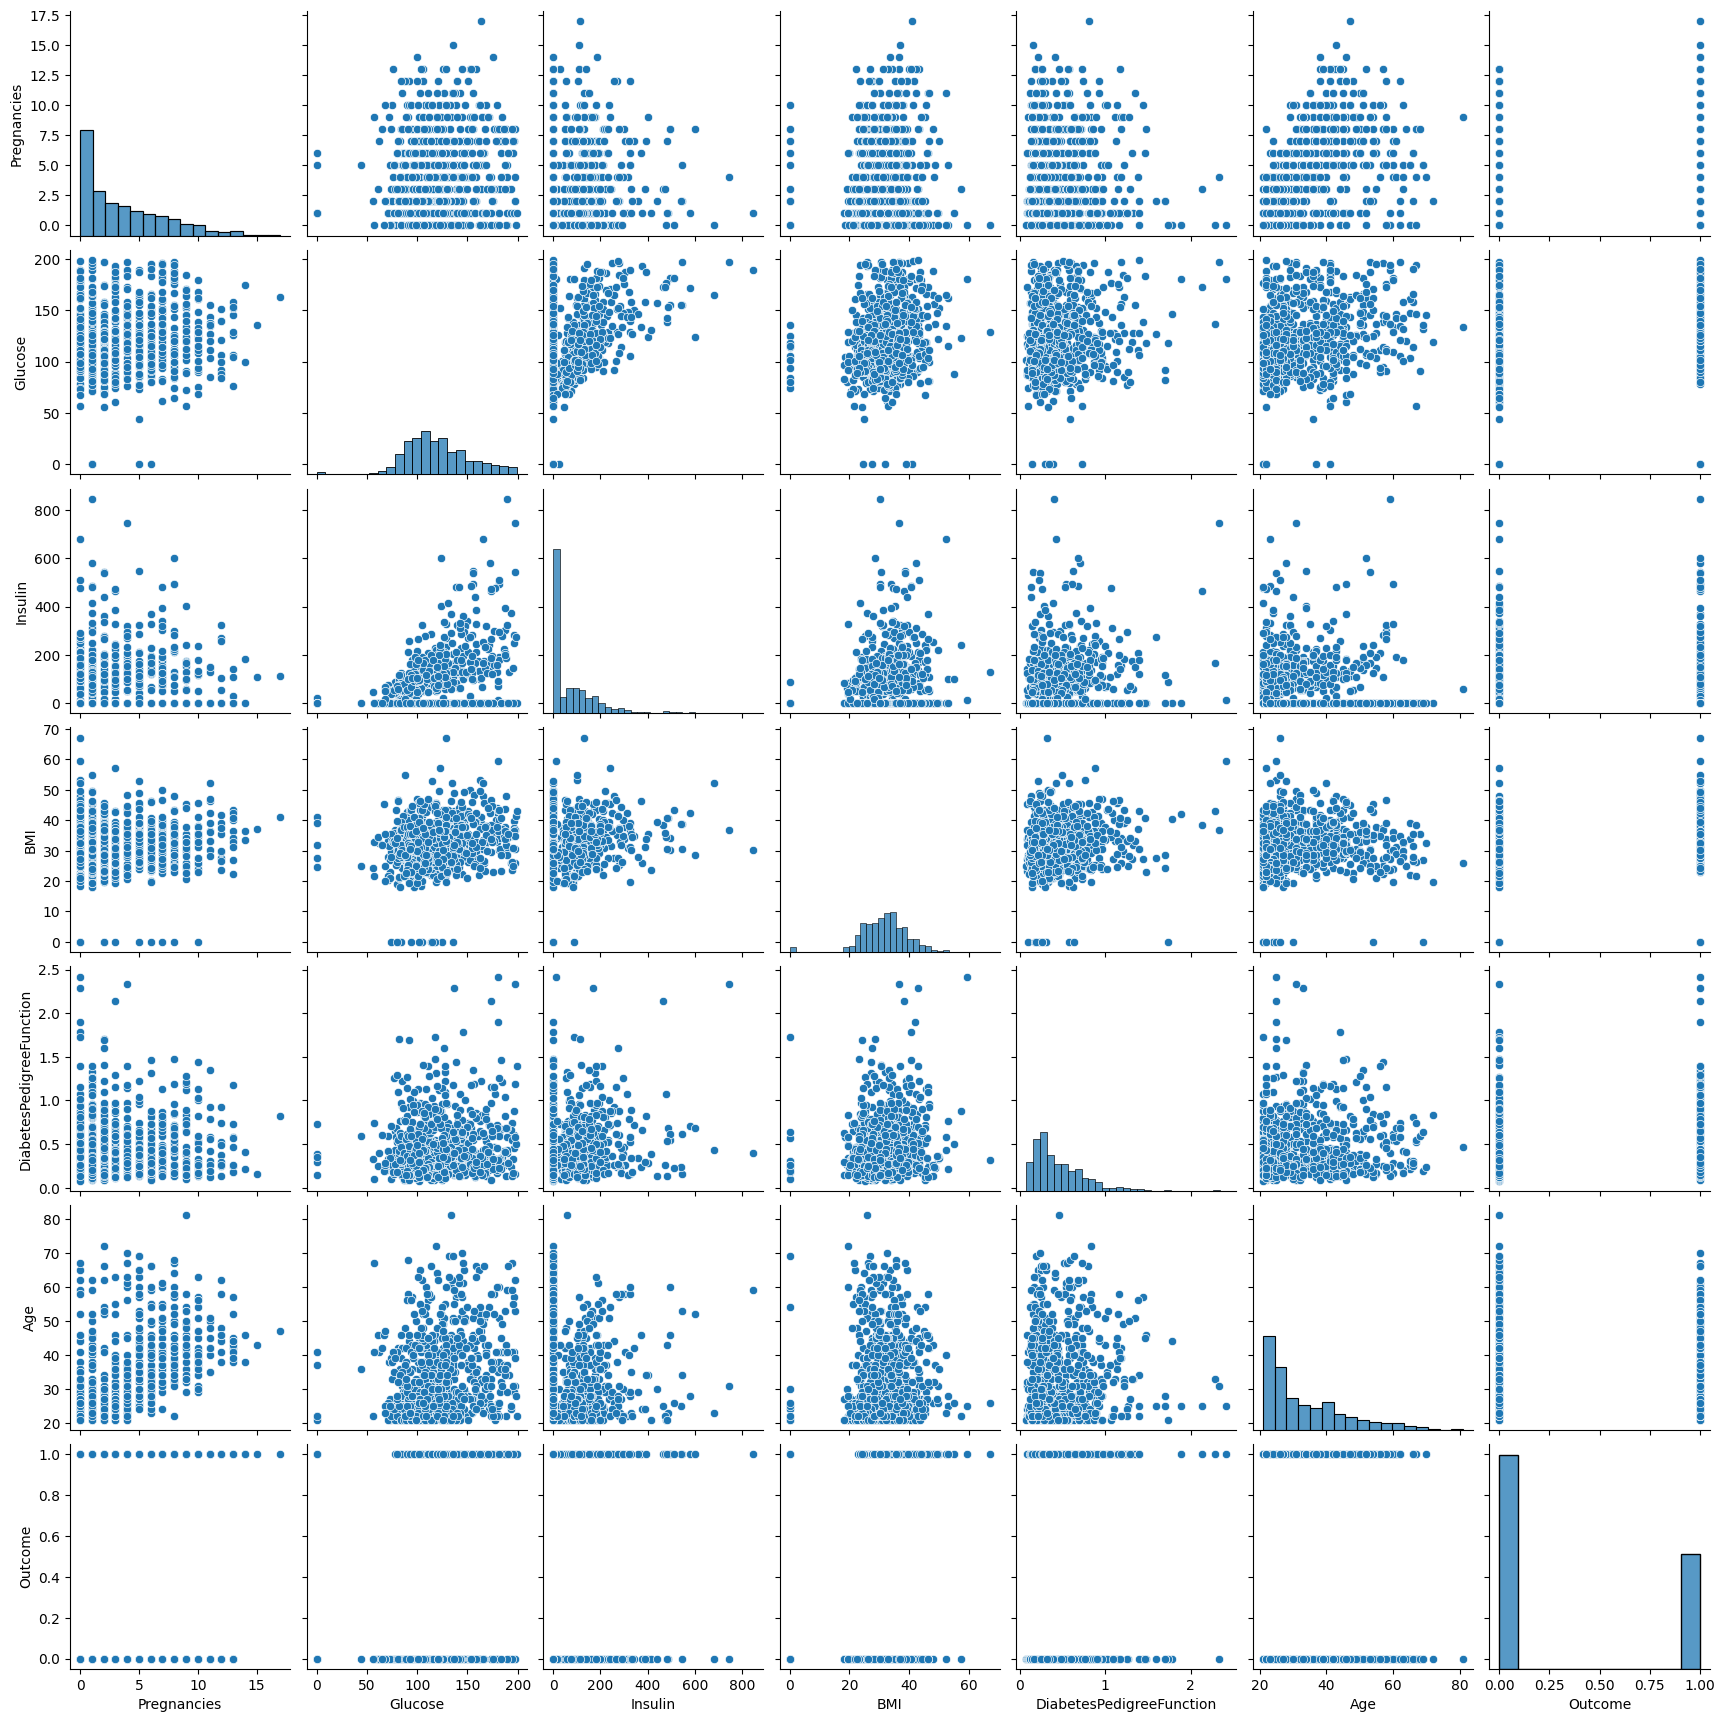

In [13]:
sns.pairplot(data = total_data)

In [14]:
total_data.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  Insulin   BMI  DiabetesPedigreeFunction  Age  \
0              6      148        0  33.6                     0.627   50   
1              1       85        0  26.6                     0.351   31   
2              8      183        0  23.3                     0.672   32   
3              1       89       94  28.1                     0.167   21   
4              0      137      168  43.1                     2.288   33   
..           ...      ...      ...   ...                       ...  ...   
763           10      101      180  32.9                     0.171   63   
764            2      122        0  36.8                     0.340   27   
765            5      121      112  26.2                     0.245   30   
766            1      126        0  30.1                     0.349   47   
767            1       93        0  30.4                     0.315   23   

     Outcome Outcome_n  
0          1         0  
1          0   

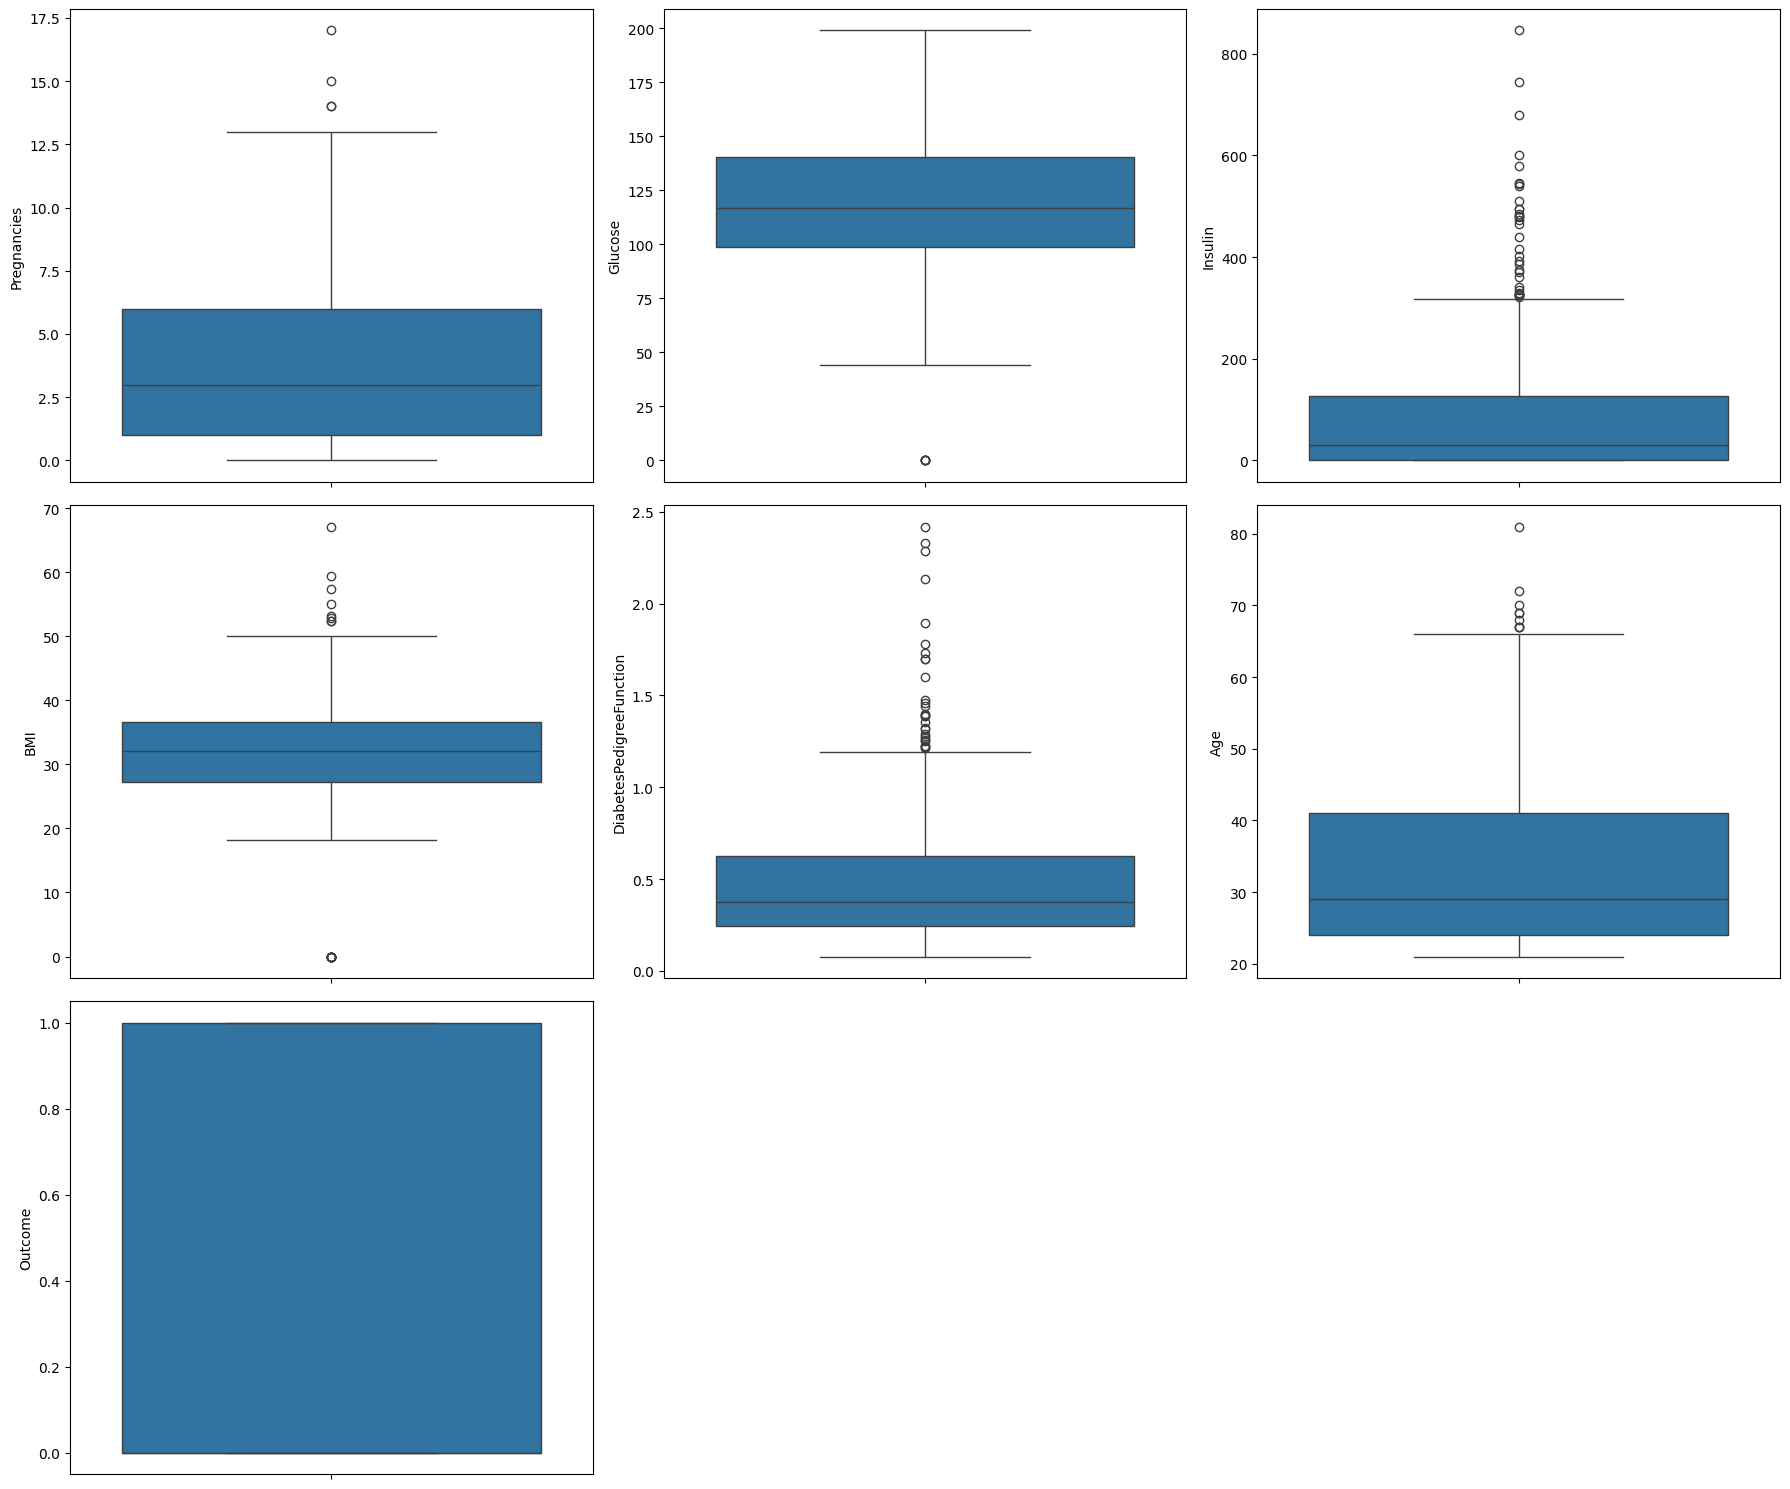

In [15]:
## Obtener las columnas numéricas del DataFrame
columns = total_data.select_dtypes(include=['number']).columns.tolist()
# Crear la figura y los ejes
num_rows = (len(columns) + 2) // 3  # Calcular el número de filas necesarias
#indicar número de columnas que deseas
num_cols = 3
fig, axis = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 5))
# Recorrer las columnas y asignarlas a los ejes
for i, col in enumerate(columns):
    row = i // num_cols  # Calcula la fila
    col_index = i % num_cols  # Calcula el índice de la columna
    sns.boxplot(ax=axis[row, col_index], data=total_data, y=col)
# Eliminar ejes vacíos si los hay
for j in range(len(columns), num_rows * num_cols):
    fig.delaxes(axis.flatten()[j])  # Elimina los ejes vacíos
# Ajustar el diseño
plt.tight_layout()
# Mostrar los gráficos
plt.show()

In [16]:
import json
variables_outliers = ["Pregnancies", "Glucose",	"Insulin",	"BMI",	"DiabetesPedigreeFunction",	"Age"]
total_data_con_outliers = total_data.copy()
total_data_sin_outliers = total_data.copy()
def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]
outliers_dict = {}
for column in variables_outliers:
  total_data_sin_outliers, limits_list = replace_outliers_from_column(column, total_data_sin_outliers)
  outliers_dict[column] = limits_list
with open("outliers_replacement.json", "w") as f:
   json.dump(outliers_dict, f)
outliers_dict

{'Pregnancies': [0, np.float64(13.5)],
 'Glucose': [np.float64(37.125), np.float64(202.125)],
 'Insulin': [0, np.float64(318.125)],
 'BMI': [np.float64(13.35), np.float64(50.550000000000004)],
 'DiabetesPedigreeFunction': [0.078, np.float64(1.2)],
 'Age': [21, np.float64(66.5)]}

In [17]:
total_data_con_outliers.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Outcome_n                   0
dtype: int64

In [18]:
total_data_sin_outliers.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Outcome_n                   0
dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

### ELEGIR LAS VARIABLES NUMÉRICAS (NO USAR LA TARGET)
num_variables = ["Pregnancies", "Glucose",	"Insulin",	"BMI",	"DiabetesPedigreeFunction",	"Age"]
# Si deseas filtrar específicamente algunas columnas, puedes hacerlo aquí.
# Por ejemplo, si quieres excluir algunas columnas específicas:
excluded_columns = ["Outcome_n"]  # Coloca aquí cualquier columna que quieras excluir
# Filtrar las columnas excluidas
num_variables = [col for col in num_variables if col not in excluded_columns]
# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = total_data_con_outliers.drop("Outcome_n", axis = 1)[num_variables]
X_sin_outliers = total_data_sin_outliers.drop("Outcome_n", axis = 1)[num_variables]
y = total_data_con_outliers["Outcome_n"]
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)
# GUARDAR LOS DATASETS
X_train_con_outliers.to_excel("C:/Users/aguil/OneDrive/Desktop/proyectos javier/Decision-Tree-Project-/models/Excel/X_train_con_outliers.xlsx", index=False)
X_train_sin_outliers.to_excel("C:/Users/aguil/OneDrive/Desktop/proyectos javier/Decision-Tree-Project-/models/Excel/X_train_sin_outliers.xlsx", index=False)
X_test_con_outliers.to_excel("C:/Users/aguil/OneDrive/Desktop/proyectos javier/Decision-Tree-Project-/models/Excel/X_test_con_outliers.xlsx", index=False)
X_test_sin_outliers.to_excel("C:/Users/aguil/OneDrive/Desktop/proyectos javier/Decision-Tree-Project-/models/Excel/X_test_sin_outliers.xlsx", index=False)
y_train.to_excel("C:/Users/aguil/OneDrive/Desktop/proyectos javier/Decision-Tree-Project-/models/Excel/y_train.xlsx", index=False)
y_test.to_excel("C:/Users/aguil/OneDrive/Desktop/proyectos javier/Decision-Tree-Project-/models/Excel/y_test.xlsx", index=False)

In [25]:
import os
import pandas as pd

BASE_PATH = "C:/Users/aguil/OneDrive/Desktop/proyectos javier/Decision-Tree-Project-/models/Excel"
TRAIN_PATHS = [
    "X_train_con_outliers.xlsx",
    "X_train_sin_outliers.xlsx"
   
]
TRAIN_DATASETS = []
for path in TRAIN_PATHS:
    TRAIN_DATASETS.append(
        # pd.read_excel(BASE_PATH + "/" + path)
        pd.read_excel(f"{BASE_PATH}/{path}")
        # pd.read_excel(os.path.join(BASE_PATH, path))
    )

TEST_PATHS = [
    "X_test_con_outliers.xlsx",
    "X_test_sin_outliers.xlsx"
]
TEST_DATASETS = []
for path in TEST_PATHS:
    TEST_DATASETS.append(
        pd.read_excel(f"{BASE_PATH}/{path}")
    )

y_train = pd.read_excel(f"{BASE_PATH}/y_train.xlsx")
y_test = pd.read_excel(f"{BASE_PATH}/y_test.xlsx")

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

results = []
for index, dataset in enumerate(TRAIN_DATASETS):
    print(index)
    model = DecisionTreeClassifier(random_state = 42)
    model.fit(dataset, y_train)
    y_pred_train = model.predict(dataset)
    y_pred_test = model.predict(TEST_DATASETS[index])

    results.append(
        {
            "train": accuracy_score(y_train, y_pred_train),
            "test": accuracy_score(y_test, y_pred_test)
        }
    )

results

0
1


[{'train': 1.0, 'test': 0.7142857142857143},
 {'train': 1.0, 'test': 0.7272727272727273}]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Definir los hiperparámetros a probar
hiperparametros = {
    "criterion": ["gini", "entropy"],   # Método para medir la impureza
    "max_depth": [3, 4, 5, 6, 7, 8, 10],  # Profundidad del árbol
    "min_samples_split": [2, 5, 10],   # Mínimo de muestras para dividir un nodo
    "min_samples_leaf": [1, 2, 5, 10]  # Mínimo de muestras en una hoja
}

# Definir modelo base
model = DecisionTreeClassifier(random_state=42)

# Aplicar GridSearch
grid = GridSearchCV(model, hiperparametros, scoring="accuracy", cv=5, n_jobs=-1)





# Mostrar los mejores parámetros
# print("Mejores parámetros:", grid.best_params_)
# print("Mejor accuracy:", grid.best_score_)
# # Separar variables predictoras (X) y la variable objetivo (y)
# X = total_data.drop(columns=["Outcome"])  # Eliminar la columna de resultado
# y = total_data["Outcome"]  # Variable objetivo (0 = No diabetes, 1 = Diabetes)
# # Dividir en conjunto de entrenamiento (80%) y prueba (20%)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# # Crear el modelo de Árbol de Decisión
# tree_model = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
# # Entrenar el modelo
# tree_model.fit(X_train, y_train)
# # Hacer predicciones
# y_pred = tree_model.predict(X_test)
# # Evaluar el modelo
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# # Visualizar el árbol de decisión
# plt.figure(figsize=(15, 8))
# plot_tree(tree_model, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
# plt.show()

In [39]:

best_dataset = 1

# Entrenar GridSearchCV con el mejor dataset
grid.fit(TRAIN_DATASETS[best_dataset], y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 10],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [40]:
final_model = grid.best_estimator_
y_pred_train = final_model.predict(TRAIN_DATASETS[best_dataset])
y_pred_test = final_model.predict(TEST_DATASETS[best_dataset])
score_train = accuracy_score(y_train, y_pred_train),
score_test = accuracy_score(y_test, y_pred_test)

print(f'Score train: {score_train}')
print(f'Score test: {score_test}')

Score train: (0.8257328990228013,)
Score test: 0.7727272727272727


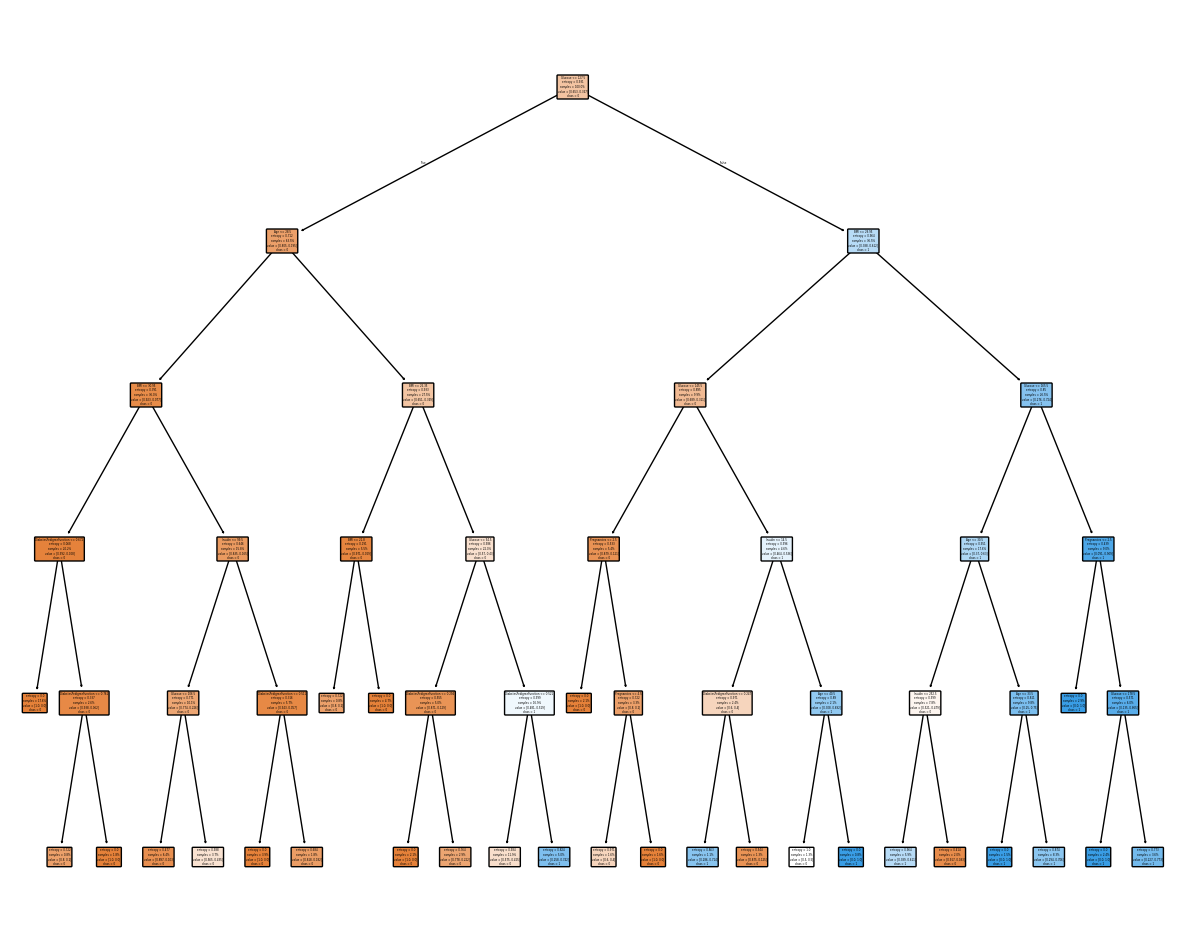

In [44]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 12))
plot_tree(final_model,
          filled = True,  # Colorea los nodos según la clase predicha
          feature_names = TRAIN_DATASETS[best_dataset].columns.tolist() ,  # Nombres de tus variables predictoras
          class_names = ['0', '1'],  # Nombres de tus clases (target)
          rounded = True,  # Hacer los bordes de los nodos redondeados
          proportion = True)  # Escalar el gráfico de manera que se ajuste mejor
plt.show()